In [63]:
#Libraries we will need.
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import IPython.display as ipd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [64]:
sample = r"E:/GlobalHubProject/urbanset/UrbanSound8K.tar/UrbanSound8K/audio/fold1/7383-3-0-1.wav" # single bark
x,freq = librosa.load(sample)
sr=freq

FileNotFoundError: ignored

In [10]:
print(x.shape)
print(type(x))
print(freq)
print(type(freq))

(88200,)
<class 'numpy.ndarray'>
22050
<class 'int'>


In [11]:
import IPython.display as ipd
ipd.Audio(sample)

<Figure size 720x216 with 0 Axes>

Text(0.5, 1.0, 'Single Bark Wave Plot')

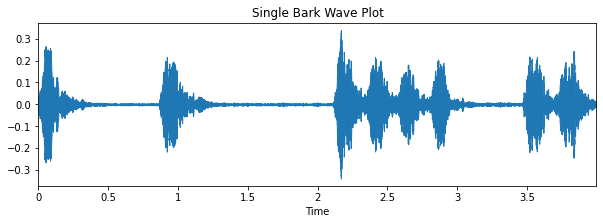

In [12]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10,3))
plt.title("Single Bark Wave Plot")
librosa.display.waveplot(x,sr=freq)

In [14]:
sample2 = "/content/7383-3-0-1.wav"
x,sr = librosa.load(sample2)
ipd.Audio(x,rate=sr) 

<Figure size 720x216 with 0 Axes>

Text(0.5, 1.0, 'Multi Bark Wave Plot')

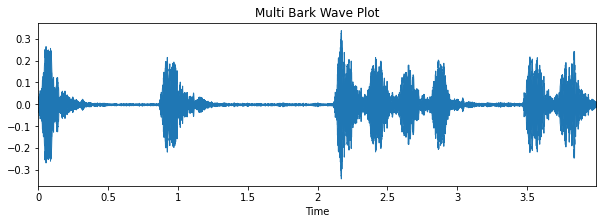

In [15]:
plt.figure(figsize=(10,3))
plt.title("Multi Bark Wave Plot")
librosa.display.waveplot(x,sr=freq)

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Multi Bark Sound Spectogram')

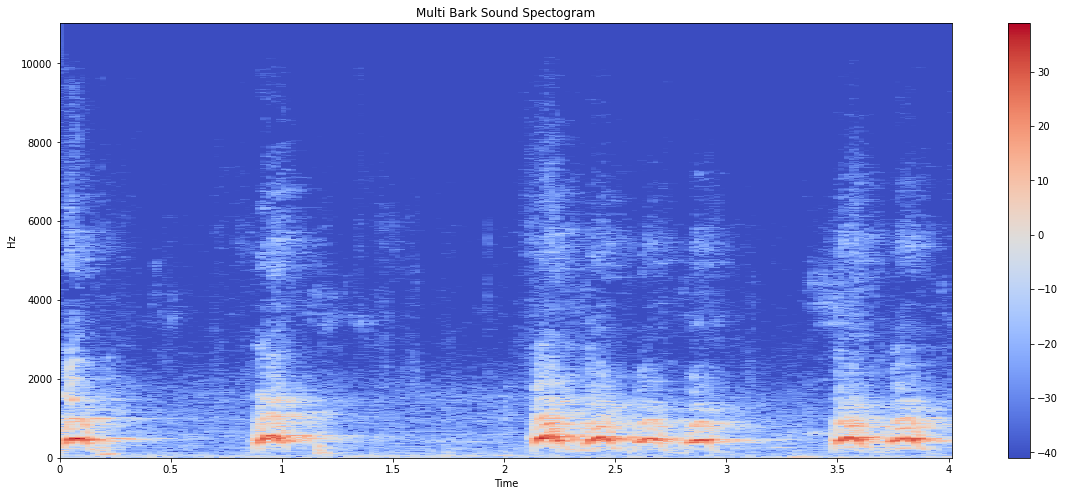

In [16]:
X=librosa.stft(x) #stft -> Short-time Fourier transform
X_db=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
plt.figure(figsize=(20,8))
librosa.display.specshow(X_db, sr=sr,x_axis="time",y_axis="hz")
plt.title("Multi Bark Sound Spectogram")
plt.colorbar()

In [18]:
sample3 = r"/content/7383-3-0-1.wav"
x,sr = librosa.load(sample3)
ipd.Audio(x,rate=sr) 

In [19]:
data_h, data_p = librosa.effects.hpss(x)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

In [20]:
ipd.Audio(data_h,rate=sr) 

Text(0.5, 1.0, 'Harmonic Mel Spectogram')

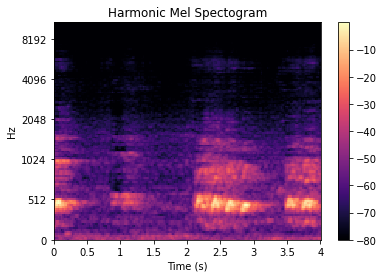

In [21]:
librosa.display.specshow(db_spec_h,y_axis='mel', x_axis='s', sr=sr)
plt.title("Harmonic Mel Spectogram")
plt.colorbar()

In [22]:
ipd.Audio(data_p,rate=sr) 

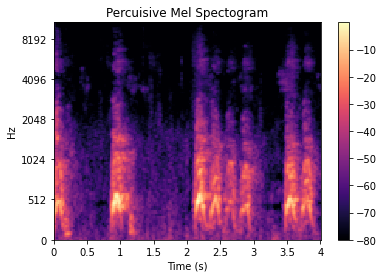

In [23]:
librosa.display.specshow(db_spec_p,y_axis='mel', x_axis='s', sr=sr)
plt.title("Percuisive Mel Spectogram")
plt.colorbar();

shape of mfcc: (20, 173)


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Mel-Frequency Cepstral Coefficients')

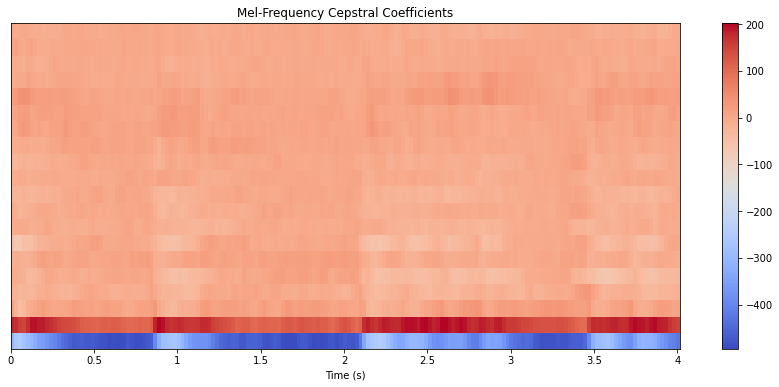

In [24]:
mfcc=librosa.feature.mfcc(x,sr=sr)
print("shape of mfcc:" ,mfcc.shape)


plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc,x_axis="s")
plt.title("Mel-Frequency Cepstral Coefficients")
plt.colorbar()

In [ ]:
zero_crossing=librosa.zero_crossings(x)
print("Type of Zero Crossing Rate",type(zero_crossing))
print(zero_crossing, " --> See it contains booleans")
print("Total Number of Zero Crossing is: ",sum(zero_crossing))

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Zero Crossing Rate')

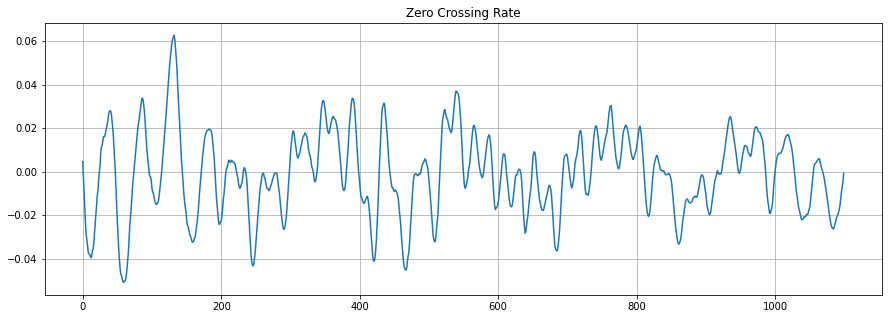

In [26]:
plt.figure(figsize=(15,5))
plt.title("Zero Crossing Rate")
plt.plot(x[4000:5100])
plt.grid()

(1, 173)


<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Spectral Centroid')

Text(0, 0.5, 'Hz')

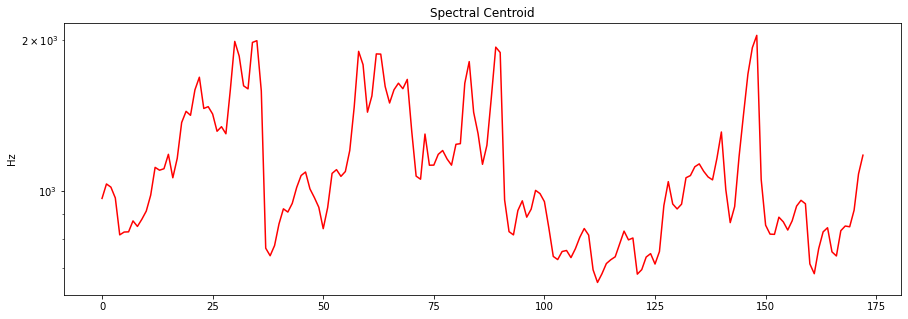

In [27]:
spec_cent=librosa.feature.spectral_centroid(x)
print(spec_cent.shape)

plt.figure(figsize=(15,5))
plt.title("Spectral Centroid")
plt.semilogy(spec_cent.T, "r")
plt.ylabel("Hz")

(1, 173)


<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Spectral Roll off')

Text(0, 0.5, 'Hz')

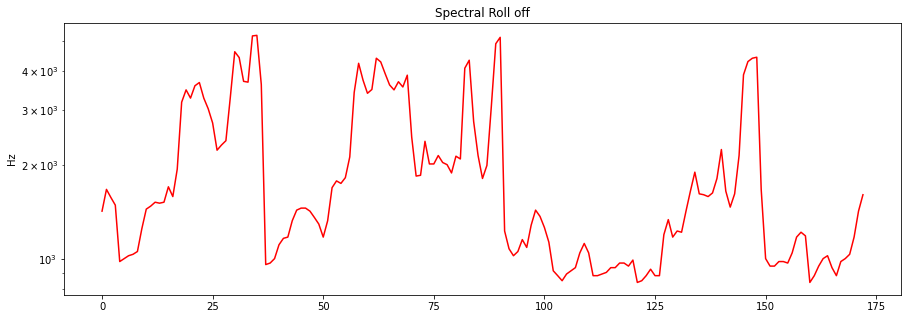

In [28]:
spec_roll=librosa.feature.spectral_rolloff(x,sr=sr)
print(spec_roll.shape)

plt.figure(figsize=(15,5))
plt.title("Spectral Roll off")
plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'Chromagram')

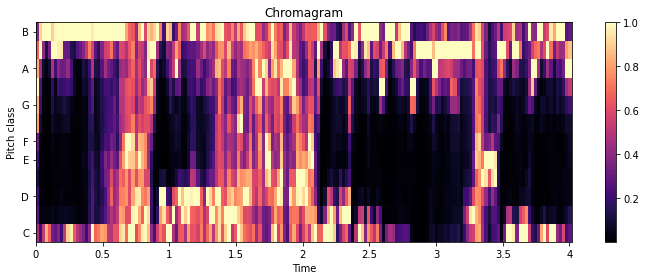

In [29]:
y, sr = librosa.load(sample3)
chroma=librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [30]:
spec_band=librosa.feature.spectral_bandwidth(x,sr=sr)
print("Spectral Bandwidth Shape: ",spec_band.shape)
print("Spectral Bandwidth: ", spec_band)
Spectral Bandwidth Shape:  (1, 1293)
Spectral Bandwidth:  [[1812.85964685 1733.36849169 1931.09627414 ... 1588.97301613
  1570.82267152 1482.40098518]]

SyntaxError: ignored

In [31]:
x,sr = librosa.load(sample3)

(1, 169)


Text(0.5, 1.0, 'Root Mean Squared Energy & log Pawer Spectogram')

[[]]

[Text(0.5, 1.0, 'log Power spectrogram')]

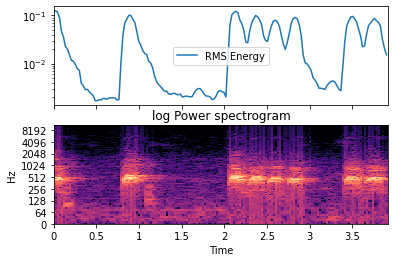

In [32]:
S = librosa.magphase(librosa.stft(x, window=np.ones, center=False))[0]
RMSEn= librosa.feature.rms(S=S)
print(RMSEn.shape)


fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(RMSEn)
plt.title("Root Mean Squared Energy & log Pawer Spectogram")
ax[0].semilogy(times, RMSEn[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()

In [51]:
#CSV_FILE_PATH = "../input/environmental-sound-classification-50/esc50.csv"  # path of csv file
CSV_FILE_PATH = "/content/UrbanSound8K.csv" # path of csv file
DATA_PATH = "/content/7383-3-0-1.wav"
#DATA_PATH = "../input/environmental-sound-classification-50/audio/audio/44100/" # path to folder containing audio files

In [52]:
df = pd.read_csv(CSV_FILE_PATH)
df.head()
print("shape of df: ", df.shape)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


shape of df:  (8732, 8)


In [53]:
df=df.drop(['fold','esc10','src_file','take'], axis=1)

KeyError: ignored

In [35]:
classes = df['category'].unique()
print("Classes are: ",classes)
print("# of Classes are: ",classes.shape[0])

NameError: ignored

In [ ]:
class_dict = {i:x for x,i in enumerate(classes)}


In [ ]:
#drop duplicates if there are any in filename...
df = df.drop_duplicates(subset=['filename'])

In [ ]:
df['target'] = df['category'].map(class_dict)
df.head()
print("df shape: ", df.shape)

In [58]:
X = []
y = []

In [59]:
for data in tqdm(df.iterrows(),  desc='Progress'):
    sig , sr = librosa.load(DATA_PATH+data[1][0])
    mfcc_ = librosa.feature.mfcc(sig , sr=sr, n_mfcc=40)
    X.append(mfcc_)
    y.append(data[1][1])

Progress: 0it [00:00, ?it/s]


FileNotFoundError: ignored

In [ ]:
X = np.array(X) 
y = np.array(y)

In [ ]:
X.shape

In [60]:
y = tf.keras.utils.to_categorical(y , num_classes=50)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

AttributeError: ignored

In [54]:
print("X Shape is: ", X.shape)
print("y Shape is: ", y.shape)

X Shape is:  (1025, 173)
y Shape is:  (88200,)


In [55]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2, random_state=42)

ValueError: ignored

In [ ]:
INPUTSHAPE = (40,216,1)

In [ ]:
model =  models.Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),  
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.GlobalAveragePooling2D(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(50 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

In [ ]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

history = model.fit(X_train,y_train ,
            validation_data=(X_test,y_test),
            epochs=40,
            callbacks = [callback],batch_size=batch_size)

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: ignored